<a href="https://colab.research.google.com/github/NBELab/NeMo/blob/main/tutorials/A_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A single neuron**

This demo shows you how to construct and manipulate a single leaky integrate-and-fire (LIF) neuron. The LIF neuron is a simple, standard neuron model, and here it resides inside a neural ‘population,’ even though there is only one neuron.

In [1]:
!pip install nengo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.5/538.5 kB 12.2 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.matplotlib import rasterplot

**Step 1: Create the Neuron**


In [3]:
from nengo.dists import Uniform

model = nengo.Network(label="A Single Neuron")
with model:
    neuron = nengo.Ensemble(
        1,
        dimensions=1,  # Represent a scalar
        # Set intercept to 0.5
        intercepts=Uniform(-0.5, -0.5),
        # Set the maximum firing rate of the neuron to 100hz
        max_rates=Uniform(100, 100),
        # Set the neuron's firing rate to increase for positive input
        encoders=[[1]],
    )

**Step 2: Provide Input to the Model**

Create an input node generating a cosine wave.

In [4]:
with model:
    cos = nengo.Node(lambda t: np.cos(8 * t))

**Step 3: Connect the Network Elements**

In [5]:
with model:
    # Connect the input signal to the neuron
    nengo.Connection(cos, neuron)

**Step 4: Add Probes**

Anything that is probed will collect the data it produces over time, allowing us to analyze and visualize it later.

In [6]:
with model:
    # The original input
    cos_probe = nengo.Probe(cos)
    # The raw spikes from the neuron
    spikes = nengo.Probe(neuron.neurons)
    # Subthreshold soma voltage of the neuron
    voltage = nengo.Probe(neuron.neurons, "voltage")
    # Spikes filtered by a 10ms post-synaptic filter
    filtered = nengo.Probe(neuron, synapse=0.01)

**Step 5: Run the Model**


In [7]:
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(1)  # Run it for 1 second

ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 467, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 389, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

**Step 6: Plot the Results**

(0.0, 1.0)

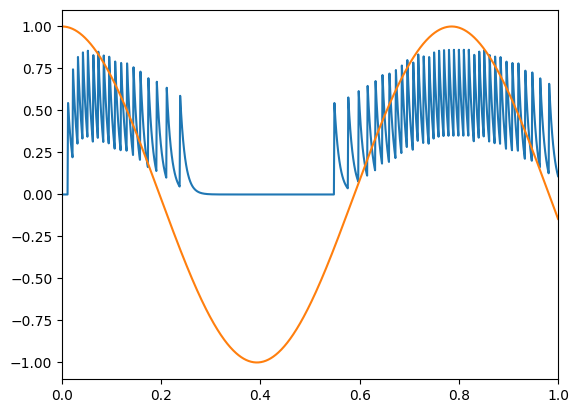

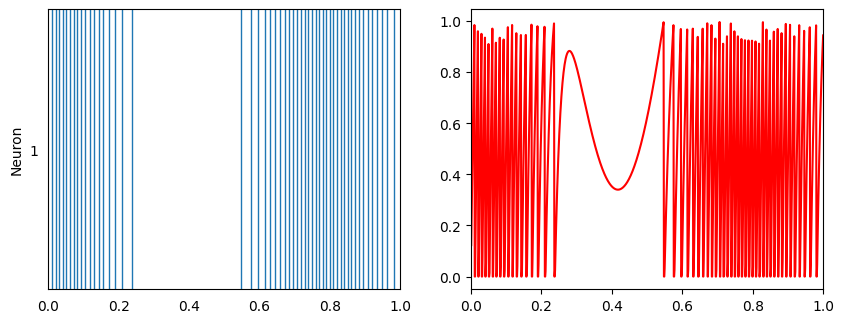

In [8]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[filtered])
plt.plot(sim.trange(), sim.data[cos_probe])
plt.xlim(0, 1)

# Plot the spiking output of the ensemble
plt.figure(figsize=(10, 8))
plt.subplot(221)
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlim(0, 1)

# Plot the soma voltages of the neurons
plt.subplot(222)
plt.plot(sim.trange(), sim.data[voltage][:, 0], "r")
plt.xlim(0, 1)

The top graph shows the input signal in green and the filtered output spikes from the single neuron population in blue. The spikes (that are filtered) from the neuron are shown in the bottom graph on the left. On the right is the subthreshold voltages for the neuron.